In [28]:
import cv2
import matplotlib.pyplot as plt
from scipy import misc #for loading image
import time

In [29]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

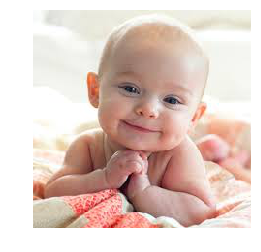

In [30]:
#load test iamge
test = misc.imread('data/test1.jpg')
plt.imshow(test)
plt.axis('off')
plt.show()

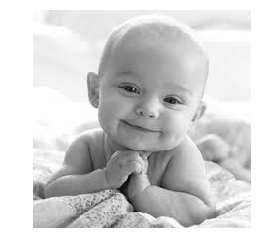

In [31]:
test = cv2.imread('data/test1.jpg')
#convert the test image to gray image
gray_img = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray_img, cmap='gray')
plt.show()

In [32]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);
print('Faces found: ', len(faces))


Faces found:  1


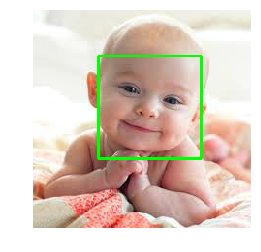

In [33]:
for (x, y, w, h) in faces:
    cv2.rectangle(test, (x, y), (x+w, y+h), (0, 255, 0), 2)
#conver image to RGB and show image
plt.imshow(convertToRGB(test))
plt.axis('off')
plt.show()

### Hàm tổng quát

In [34]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    img_copy = colored_img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)   
    return img_copy

### Với ảnh gồm các khuôn mặt nhìn trực diện, hệ thống phát hiện rất hiệu quả

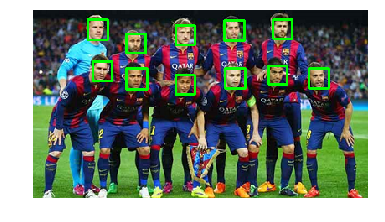

In [35]:
#load another image
test = cv2.imread('data/fcb.png')
faces_detected_img = detect_faces(haar_face_cascade, test)
plt.axis('off')
plt.imshow(convertToRGB(faces_detected_img))
plt.show()

### Phát hiện khá tốt với cả đám đông nhiều người, kể cả mặt nhìn nghiêng

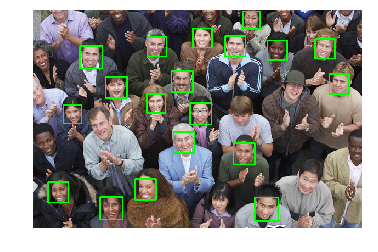

In [36]:
#load another image
test = cv2.imread('data/p.png')
faces_detected_img = detect_faces(haar_face_cascade, test)
plt.axis('off')
plt.imshow(convertToRGB(faces_detected_img))
plt.show()

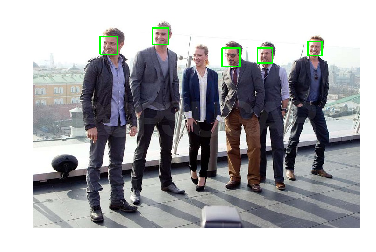

In [37]:
#load another image
test = cv2.imread('data/a.jpg')
faces_detected_img = detect_faces(haar_face_cascade, test)
plt.axis('off')
plt.imshow(convertToRGB(faces_detected_img))
plt.show()

### Bị hạn chế bởi điều kiện ánh sáng

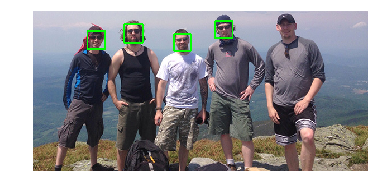

In [38]:
#load another image
test = cv2.imread('data/test7.jpg')
faces_detected_img = detect_faces(haar_face_cascade, test)
plt.axis('off')
plt.imshow(convertToRGB(faces_detected_img))
plt.show()

### Ít chính xác nếu khuôn mặt tối

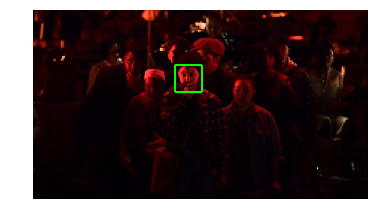

In [39]:
#load another image
test = cv2.imread('data/gg.jpg')
faces_detected_img = detect_faces(haar_face_cascade, test)
plt.axis('off')
plt.imshow(convertToRGB(faces_detected_img))
plt.show()

### Xuất hiện sai dương tính

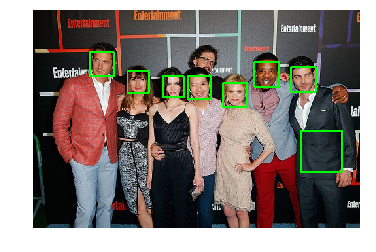

In [40]:
test = cv2.imread('data/test4.jpg')
faces_detected_img = detect_faces(haar_face_cascade, test)
plt.imshow(convertToRGB(faces_detected_img))
plt.axis('off')
plt.show()

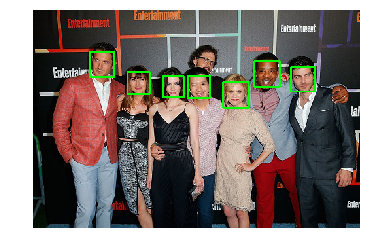

In [41]:
test = cv2.imread('data/test4.jpg')
faces_detected_img = detect_faces(haar_face_cascade, test, scaleFactor=1.2)
plt.imshow(convertToRGB(faces_detected_img))
plt.axis('off')
plt.show()

### Đánh giá thời gian

In [42]:
#load test image1
test1 = cv2.imread('data/test5.jpg')
#load test image2
test2 = cv2.imread('data/test6.jpg')

#------------HAAR-----------
t1 = time.time()
haar_detected_img1 = detect_faces(haar_face_cascade, test1)
t2 = time.time()
dt1 = t2 - t1

#------------LBP-----------
t1 = time.time()
haar_detected_img2 = detect_faces(haar_face_cascade, test2)
t2 = time.time()
dt2 = t2 - t1

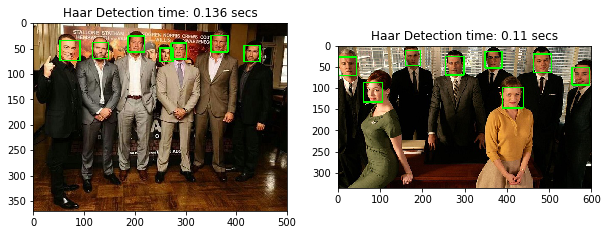

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img1))

ax2.set_title('Haar Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(haar_detected_img2))
plt.show()

#### Như ở ví dụ trên là mất cỡ 0.03s để phát hiện một khuôn mặt

## NHẬN XÉT

Ưu điểm: 
- Phát hiện các khuôn mặt với độ chính xác cao
- Tỷ lệ sai dương tính nhỏ

Nhược điểm:
- Tính toán phức tạp
- Thời gian training dài
- Ít chính xác với các khuôn mặt tối, hoặc ảnh có tỷ lệ các khuôn mặt không đồng đều do đứng trước đứng sau.
- Hiệu suất bị hạn chế trong điều kiện ánh sáng không tốt